# Processamento de Linguagem Natural

## Instalação do pacote NLTK
### http://www.nltk.org/

In [ ]:
# Instalação do módulo NLTK
#!pip install nltk

In [81]:
import nltk

In [ ]:
# Instalando os arquivos de dados do NLTK
#nltk.download('all')

## Tokenization

Processo de dividir uma string em listas de pedaços ou "tokens". Um token é uma parte inteira. <br>
Por exemplo: uma palavra é um token em uma sentença. Uma sentença é um token em um parágrafo. <br>

### Dividindo um parágrafo em frases

In [153]:
paragrafo = "A Amazon confirmou que adquiriu os direitos da franquia O Senhor dos Anéis. " + \
            "Ela encomendou uma série de TV com múltiplas temporadas. A informação é da Variety."

In [154]:
from nltk.tokenize import sent_tokenize

In [155]:
# Dividindo o parágrafo em frases
sent_tokenize(paragrafo)

['A Amazon confirmou que adquiriu os direitos da franquia O Senhor dos Anéis.',
 'Ela encomendou uma série de TV com múltiplas temporadas.',
 'A informação é da Variety.']

### Dividindo uma frase em palavras

In [156]:
from nltk.tokenize import word_tokenize

In [157]:
word_tokenize('a adaptação televisiva explorará novas tramas antecedendo A Sociedade do Anel')

['a',
 'adaptação',
 'televisiva',
 'explorará',
 'novas',
 'tramas',
 'antecedendo',
 'A',
 'Sociedade',
 'do',
 'Anel']

In [162]:
# expressões regulares
from nltk.tokenize import regexp_tokenize

In [168]:
frase = "A conta de luz foi mais de R$ 500,00"
regexp_tokenize(frase, "[\w\d,$]+")

['A', 'conta', 'de', 'luz', 'foi', 'mais', 'de', 'R$', '500,00']

In [172]:
regexp_tokenize(frase, "[\d]+,[\d]+") # só para extrair número

['500,00']

In [175]:
regexp_tokenize(frase, "[\D]+") # só para extrair texto

['A conta de luz foi mais de R$ ', ',']

## Stopwords

Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da informação e do processamento da linguagem natural. São palavras como "The" e "a" ((em inglês) ou "O/A" e "Um/Uma" ((em português). Muitos mecanismos de busca filtram estas palavras (stopwords), como forma de economizar espaço em seus índices de pesquisa.

In [176]:
from nltk.corpus import stopwords

In [177]:
portuguese_stops = set(stopwords.words('portuguese'))

In [183]:
stopwords.words('portuguese')[:12]

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não']

In [185]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [187]:
print ("Número de stopwords em Português: ", len(stopwords.words('portuguese')))
print ("Número de stopwords em Inglês: ", len(stopwords.words('english')))

Número de stopwords em Português:  203
Número de stopwords em Inglês:  153


In [193]:
frase = "O Senhor dos Anéis é um fenômeno que capturou a imaginação de fãs pela literatura e na telona"
frase_tok = word_tokenize(frase)
# divide em palavras
frase2 = [palavra for palavra in frase_tok if palavra not in portuguese_stops]
print (frase)
print(frase2)

O Senhor dos Anéis é um fenômeno que capturou a imaginação de fãs pela literatura e na telona
['O', 'Senhor', 'Anéis', 'é', 'fenômeno', 'capturou', 'imaginação', 'fãs', 'literatura', 'telona']


## Collocations

Collocations são duas ou mais palavras que tendem a aparecer frequentemente juntas, como "Estados Unidos" ou "Rio Grande do Norte". Essas palavras podem gerar diversas combinações e por isso o contexto também é importante no processamento de linguagem natural.

In [219]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

In [220]:
texto = "alguma coisa estranha aconteceu naquele dia. Não sei o que houve, mas ela chegou outra vez".split()
words = [w.lower() for w in texto]

In [221]:
bcf = BigramCollocationFinder.from_words(words)
bcf.nbest(BigramAssocMeasures.likelihood_ratio,2)

[('aconteceu', 'naquele'), ('alguma', 'coisa')]

## Stemming Words

Stemming é a técnica de remover sufixos e prefixos de uma palavra, chamada stem. Por exemplo, o stem da palavra cooking é cook. Um bom algoritmo sabe que "ing" é um sufixo e pode ser removido. Stemming é muito usado em mecanismos de buscas para indexação de palavras. Ao invés de armazenar todas as formas de uma palavras, um mecamismo de busca armazena apenas o stem da palavra, reduzindo o tamanho do índice e aumentando a performance do processo de busca.

In [230]:
from nltk.stem import PorterStemmer

In [231]:
stemmer = PorterStemmer()

In [232]:
stemmer.stem('cooking')

'cook'

In [233]:
stemmer.stem('cookery')

'cookeri'

In [222]:
from nltk.stem import RSLPStemmer # para português

In [ ]:
st = RSLPStemmer()

In [235]:
st.stem("correu")

'corr'

In [236]:
st.stem("correndo")

'corr'

In [237]:
st.stem("correr")

'corr'

In [229]:
# opening lines of Erico Verissimo's "Música ao Longe"
text = '''
Clarissa risca com giz no quadro-negro a paisagem que os alunos devem copiar. 
Uma casinha de porta e janela , em cima dumacoxilha .'''
text_stem = ""
for token in text.split():
    #print(st.stem(token))
    text_stem = text_stem + st.stem(token) + " "
text_stem

'clariss risc com giz no quadro-negr a pais que os alun dev copiar. uma cas de port e janel , em cim dumacoxilh . '

## Corpus

Corpus é uma coleção de documentos de texto e Corpora é o plural de Corpus. Esse termo vem da palavra em Latim para corpo (nesse caso, o corpo de um texto). Um Corpus customizado é uma coleção de arquivos de texto organizados em um diretório.

Se você for treinar seu próprio modelo como parte de um processo de classificação de texto (como análise de texto), você terá que criar seu próprio Corpus e treiná-lo.

# Fazer downloads de livros em .txt e colocar no diretório do jupyter notebook
https://www.gutenberg.org/browse/languages/pt

In [239]:
!ls *.txt  # no windows !Dir *.txt

BrazCubas.txt
Nicolau Maquiavel – O Príncipe Ao Magnífico.txt
Oprincipe.txt
corpus.txt
hamlet.txt
irmaos_grimm.txt
uol.txt


## Criando um Corpus (estrutura do documento para trabalhar com funções do NLTK)

In [245]:
from nltk.corpus import PlaintextCorpusReader
arquivos =  ['hamlet.txt', 'BrazCubas.txt.', 'irmaos_grimm.txt', 'Oprincipe.txt']
corpus_root = '.'
newcorpus = PlaintextCorpusReader(corpus_root, arquivos)  

In [246]:
newcorpus.fileids()

['hamlet.txt', 'BrazCubas.txt.', 'irmaos_grimm.txt', 'Oprincipe.txt']

### livro: hamlet.txt - em português

In [247]:
hamlet = newcorpus.words('hamlet.txt')
hamlet[:5]

['Project', 'Gutenberg', "'", 's', 'Hamlet']

In [399]:
fileid = 'hamlet.txt'
print("numero de sentenças = ",len(newcorpus.sents(fileid)))
print("numero de palavras = ",len(newcorpus.words(fileid)))

numero de sentenças =  3915
numero de palavras =  43861


In [248]:
# converte para minúsculas
hamlet = [w.lower() for w in hamlet]

### Acessar funções específicas de texto do NLTK

In [249]:
from nltk.text import Text

In [402]:
text = Text(hamlet)

In [403]:
# Collocations
text.collocations()

project gutenberg; vossa alteza; minha mãe; literary archive; meu pae;
primeiro coveiro; electronic works; archive foundation; http ://;
public domain; united states; gutenberg literary; vossa magestade; set
forth; meu senhor; segundo coveiro; tudo quanto; teu pae; electronic
work; alguma cousa


In [406]:
text.similar('Rei')

que céu coração homem amor coveiro dia cadaver senhor hei joven motivo
mundo mar espirito irmão demonio resto povo filho


In [411]:
text.concordance('Principe')

Displaying 25 of 38 matches:
mbra do rei hamlet . fortimbraz -- principe de noruega . gertrudes -- rainha d
 horacio ? marcello . marcello meu principe ! hamlet alegro - me de te ver , b
oite . todos os nossos respeitos , principe . hamlet sempre amigos , adeus . (
llar - vos a sós . marcello veja , principe , o gesto cheio de cortezia e dign
 detenha . horacio seja rasoavel , principe , não vá . hamlet ouço a voz do me
ue for melhor . marcello sigamos o principe . ( sáem todos .) scena v uma part
arias . horacio conte - nol - as , principe . hamlet é um segredo . horacio e 
 não sou eu capaz de o guardar ? o principe conhece - me . marcello e eu ? ham
 ambos conte com a nossa palavra , principe . hamlet quero um juramento . hora
o . horacio diga - nos a formula , principe . hamlet ( afastando - se um pouco
inha filha : _o senhor hamlet é um principe collocado fóra da tua esphera ; is
para abreviar a minha narração , o principe , vendo - se assim repellido , caí
s louvado . polonio con

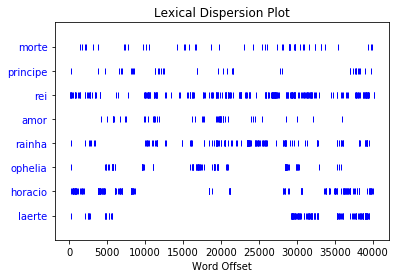

In [253]:
# Ocorrência (localização) dos termos em um documento
palavras = ["morte", "principe", "rei", "amor", "rainha", "ophelia", "horacio", "laerte"]
text.dispersion_plot(palavras)

In [252]:
fd = nltk.FreqDist(hamlet)
print(fd.most_common(70))

[(',', 3163), ('.', 1805), ('a', 1331), ('o', 1301), ('que', 1160), ('-', 944), ('e', 889), ('de', 753), ('se', 503), ('hamlet', 502), (';', 435), ('não', 433), ('?', 427), ('um', 397), ('é', 379), ('me', 319), ('!', 314), ('os', 310), ('do', 302), ('da', 275), ('(', 253), ('as', 250), ('rei', 243), ('uma', 242), ('em', 240), ('para', 236), ("'", 226), ('meu', 197), ('mais', 188), ('the', 179), ('com', 178), ('mas', 175), ('sua', 173), ('como', 167), ('senhor', 164), ('horacio', 162), ('no', 156), ('por', 151), ('lhe', 151), ('te', 150), ('ao', 147), ('minha', 146), ('á', 141), ('.)', 131), ('polonio', 131), ('rainha', 130), ('seu', 124), ('of', 120), ('laerte', 117), ('na', 115), ('eu', 113), (')', 111), ('nos', 102), ('este', 96), ('ophelia', 95), ('n', 94), ('gutenberg', 93), ('esta', 92), ('project', 89), ('d', 86), ('to', 83), ('está', 81), ('porque', 81), ('or', 78), ('bem', 78), ('ha', 77), (':', 75), ('ou', 75), ('rosencrantz', 74), ('elle', 74)]


### livro: Memórias Póstumas de Braz Cubas - BrazCubas.txt

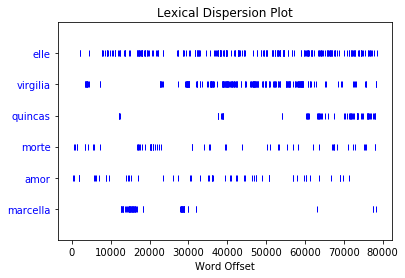

In [254]:
BrazCubas = newcorpus.words('BrazCubas.txt')
BrazCubas = [w.lower() for w in BrazCubas] # converter o livro para minusculas
text = Text(BrazCubas)
names = ["elle", "virgilia", "quincas", "morte","amor", "marcella"]
text.dispersion_plot(names)

In [381]:
# retirar as stopwords do texto e pontuacoes
def retirar_pontuacoes_lixos_stopwords(text):
    pontuacoes_e_lixo = [  ',', '.', '-', ';', '?', 'é', '!', '(', 'o', "'", 'the', ')', '1', ':', '--',
                     'a', 'o', 'de', 'que', "˜", "se", ';' ,'do','da', 'as', 'e', 'os', 'um', 'O',
                     'uma', 'em', 'pera', 'meu', 'mais', 'com',
                     'para', 'mais', 'como', 'á', 'te', 'ao', 
                     'me', 'sua', 'no', 'por', '.)', 'of', 'n', 'este', 'd', 'to', "tão", "tm", "work", "assim",
                     'project', 'gutenberg', "works", "!--", "electronic", "..."]

    stopwords_br = nltk.corpus.stopwords.words('portuguese')
    stopwords_en = nltk.corpus.stopwords.words('english')
    text = [w.lower() for w in text if w.lower() not in stopwords_br+stopwords_en]
    text = [w.lower() for w in text if w.lower() not in pontuacoes_e_lixo]
    return text

In [382]:
BrazCubas2 = retirar_pontuacoes_lixos_stopwords(BrazCubas)
text = Text(BrazCubas2)
text = [w.lower() for w in text]

In [383]:
fd = nltk.FreqDist(BrazCubas2)
print(fd.most_common(50))

[('elle', 237), ('virgilia', 205), ('capitulo', 203), ('disse', 188), (',--', 174), ('ella', 160), ('cousa', 150), ('porque', 140), ('olhos', 139), ('outro', 126), ('nada', 125), ('outra', 123), ('vida', 120), ('menos', 112), ('tempo', 112), ('homem', 109), ('casa', 107), ('mim', 102), ('tudo', 101), ('então', 100), ('pouco', 99), ('ser', 98), ('dia', 94), ('ainda', 91), ('ha', 86), ('alguma', 84), ('annos', 82), ('pae', 81), ('talvez', 80), ('vez', 80), ('agora', 76), ('dizer', 75), ('ás', 74), ('alguns', 74), ('dizia', 73), ('bem', 73), ('grande', 72), ('todos', 70), ('cousas', 69), ('dias', 69), ('logo', 69), ('borba', 69), ('ia', 68), ('quincas', 66), ('podia', 64), ('lá', 64), ('sei', 63), ('placida', 63), ('outros', 62), ('morte', 61)]


### livro: Irmãos Grimm 

In [330]:
IrmaosGrimm = newcorpus.words('irmaos_grimm.txt')
IrmaosGrimm2 = retirar_pontuacoes_lixos_stopwords(IrmaosGrimm)
text = Text(IrmaosGrimm2)
#text = [w.lower() for w in text]
fd = nltk.FreqDist(IrmaosGrimm2)
print(fd.most_common(30))

[('joão', 59), ('rapaz', 43), ('pequenino', 36), ('ouro', 36), ('onde', 34), ('bem', 33), ('tres', 32), ('elle', 28), ('ainda', 27), ('tudo', 27), ('disse', 26), ('vez', 25), ('então', 25), ('foundation', 25), ('pois', 24), ('havia', 24), ('viu', 24), ('diabo', 23), ('moço', 23), ('casa', 23), ('rei', 23), ('terms', 21), ('outra', 20), ('deu', 20), ('agora', 20), ('pae', 20), ('porque', 19), ('dar', 19), ('vacca', 19), ('mulher', 19)]


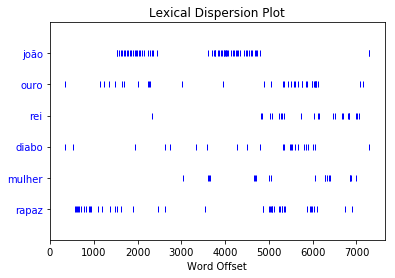

In [331]:
names = ["joão", "ouro", "rei", "diabo","mulher", "rapaz"]
text.dispersion_plot(names)

Vocabulary plot:


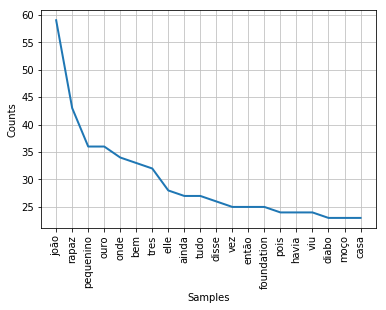

In [332]:
print("Vocabulary plot:")
text.plot(20)

In [333]:
IrmaosGrimm_str = " ".join(str(x) for x in text.tokens)

### Word Cloud - Nuvem de Palavras

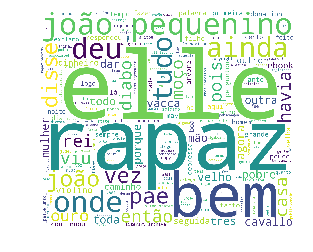

In [334]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(
                          background_color='white',
                          width=1400,
                          height=1200
                         ).generate(IrmaosGrimm_str)


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [337]:
text.similar("rapaz")

chegasse rainha ralhando


In [341]:
# vocabulario
d = text.vocab()
d.freq

<bound method FreqDist.freq of FreqDist({'joão': 59, 'rapaz': 43, 'pequenino': 36, 'ouro': 36, 'onde': 34, 'bem': 33, 'tres': 32, 'elle': 28, 'ainda': 27, 'tudo': 27, ...})>

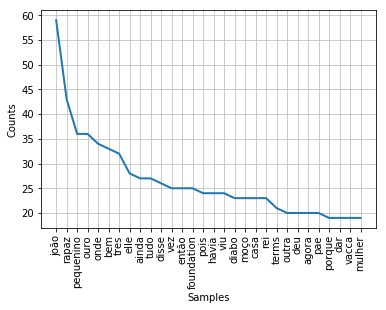

In [342]:
d.plot(30)

## Acessar uma página da internet

In [343]:
from nltk.tokenize import word_tokenize
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf8')
    raw = BeautifulSoup(html, "lxml").get_text()
    raw = [w.lower() for w in raw if w.lower() not in stopwords]
    raw = [w.lower() for w in raw if w.lower() not in pontuacoes_e_lixo] 
    raw = ''.join(raw)
    #raw = Text(raw)
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

In [344]:
from bs4 import BeautifulSoup

url = constitution = "https://www.archives.gov/founding-docs/constitution-transcript"
#url = constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
req = request.urlopen(url).read().decode('utf8')
soup = BeautifulSoup(req,"lxml")
len(soup)

3

In [352]:
linhas = ""
for sub_heading in soup.find_all('p'):
    #print(sub_heading.text)
    linhas += sub_heading.text
print(linhas[:320])

America's Founding Documents

Note: The following text is a transcription of the Constitution as it was inscribed by Jacob Shallus on parchment (the document on display in the Rotunda at the National Archives Museum.) The spelling and punctuation reflect the original.We the People of the United States, in Order to form


In [358]:
constituicao = linhas.split()

In [359]:
fd = nltk.FreqDist(constituicao)
print(fd.most_common(30))

[('the', 392), ('of', 292), ('and', 188), ('shall', 180), ('be', 124), ('to', 93), ('in', 86), ('or', 79), ('United', 54), ('a', 51), ('by', 48), ('any', 42), ('for', 41), ('States,', 39), ('on', 33), ('which', 33), ('State', 33), ('such', 33), ('as', 31), ('may', 31), ('have', 30), ('all', 30), ('The', 25), ('from', 24), ('other', 23), ('he', 22), ('their', 20), ('President', 20), ('States', 19), ('House', 19)]


In [389]:
url = news = "https://educacao.uol.com.br/noticias/2017/11/06/prova-do-enem-tem-textos-de-racionais-mcs-a-machado-de-assis.htm"
req = request.urlopen(url).read().decode('utf8')
soup = BeautifulSoup(req,"lxml")
linhas = ""
for sub_heading in soup.find_all('p'):
    print(sub_heading.text)
    linhas += sub_heading.text

 Do UOL, em São Paulo 
UOL
A professora de português Maria Márcia Garrote
 A prova de português do Enem (Exame Nacional do Ensino Médio), aplicada neste domingo (5), chamou a atenção pela versatilidade de estilos de textos, que variaram de uma música popular do grupo de rap Racionais MC´s a um conto do escritor Machado de Assis.
 Em debate no estúdio do UOL, a professora de português Maria Marcia Garrote, do cursinho Objetivo, afirmou que os textos da prova foram usados de diversas maneiras, tanto para dar um enfoque social a determinados assuntos como para explorar as nuances da alma humana.
 A letra da música Fim de semana no Parque, dos Racionais, foi reproduzida na prova para abordar o tema do contraste entre os espaços de lazer na periferia e nas partes mais ricas das cidades, segundo a professora.
 Também foi feita referência aos Festivais Internacionais da Canção e reproduzido um texto do ator e cronista Gregório  Duvivier.
 A professora citou uma questão que trazia um conto do 

In [394]:
texto = linhas.split()
tk = retirar_pontuacoes_lixos_stopwords(texto)
fd = nltk.FreqDist(tk)
print(fd.most_common(30))

[('prova', 6), ('textos', 4), ('professora', 3), ('português', 3), ('uol,', 2), ('maria', 2), ('atenção', 2), ('música', 2), ('conto', 2), ('escritor', 2), ('machado', 2), ('cursinho', 2), ('afirmou', 2), ('segundo', 2), ('inglês', 2), ('vocabulário', 2), ('paulo', 1), ('uola', 1), ('márcia', 1), ('garrote', 1), ('enem', 1), ('(exame', 1), ('nacional', 1), ('ensino', 1), ('médio),', 1), ('aplicada', 1), ('neste', 1), ('domingo', 1), ('(5),', 1), ('chamou', 1)]


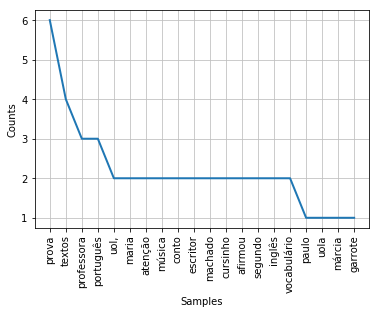

In [395]:
fd.plot(20)

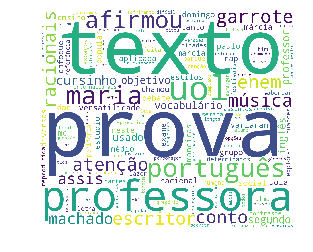

In [396]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud2 = WordCloud(
                          background_color='white',
                          width=1400,
                          height=1200
                         ).generate(" ".join(tk))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [42]:
from nltk.corpus import floresta
floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [95]:
floresta.tagged_words()[:10]

[('Um', '>N+art'),
 ('revivalismo', 'H+n'),
 ('refrescante', 'N<+adj'),
 ('O', '>N+art'),
 ('7_e_Meio', 'H+prop'),
 ('é', 'P+v-fin'),
 ('um', '>N+art'),
 ('ex-libris', 'H+n'),
 ('de', 'H+prp'),
 ('a', '>N+art')]

In [96]:
psents = floresta.parsed_sents()
psents[5].draw() 

In [105]:
type(psents)

nltk.tree.Tree

In [100]:
floresta.sents()[20]

['«',
 'O',
 'senhor',
 'ministro',
 'interpretará',
 'esta',
 'sugestão',
 'como',
 'entender',
 '.']

In [110]:
psents = floresta.parsed_sents()[20]
type(psents)

nltk.tree.Tree

In [112]:
psents[:30]

[Tree('«', ['«']),
 Tree('SUBJ+np', [Tree('>N+art', ['O']), Tree('H+n', ['senhor']), Tree('N<+n', ['ministro'])]),
 Tree('P+v-fin', ['interpretará']),
 Tree('ACC+np', [Tree('>N+pron-det', ['esta']), Tree('H+n', ['sugestão'])]),
 Tree('ADVL+pp', [Tree('H+prp', ['como']), Tree('P<+v-fin', ['entender'])]),
 Tree('»"', []),
 Tree('.', ['.'])]

In [111]:
psents.draw() 

In [104]:
!pwd

/Users/valencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/machineLearning/PLN


In [36]:
import nltk

In [10]:
from gensim.models import Word2Vec
from nltk.corpus import brown, movie_reviews, treebank

In [ ]:
b = Word2Vec(brown.sents())
mr = Word2Vec(movie_reviews.sents())
t = Word2Vec(treebank.sents())

In [40]:
b.most_similar('money', topn=5)

[('care', 0.9141373634338379),
 ('chance', 0.9031793475151062),
 ('job', 0.8931745290756226),
 ('trouble', 0.867975115776062),
 ('easy', 0.8590294718742371)]

In [43]:
t = Word2Vec(floresta.sents())

In [46]:
t.most_similar('senhor', topn=5)

[('encontrar', 0.9994375109672546),
 ('sido', 0.9993372559547424),
 ('Ele', 0.999332845211029),
 ('gente', 0.9993289709091187),
 ('Só', 0.9993187785148621)]

In [127]:
s = Word2Vec(hamlet.sents())

AttributeError: 'list' object has no attribute 'sents'

In [124]:
t.most_similar('morte', topn=9)

[('já', 0.9996774792671204),
 ('política', 0.9996739029884338),
 ('primeira', 0.9996469616889954),
 ('primeiro', 0.9995967149734497),
 ('história', 0.9995721578598022),
 ('noite', 0.9995443820953369),
 ('abertura', 0.9995297789573669),
 ('maior', 0.9994939565658569),
 ('depois', 0.9994921684265137)]

In [16]:
n = Word2Vec(stext.split('.'))

In [11]:
n = Word2Vec(text)

In [12]:
n.vector_size

100

In [22]:
print(n.max_vocab_size)

None


In [18]:
n.most_similar('uol')

KeyError: "word 'uol' not in vocabulary"

In [69]:
ss = '\n\n'.join(stext.split('.'))

In [74]:
ss

' Do UOL, em São Paulo  UOL A professora de português Maria Márcia Garrote  A prova de português do Enem (Exame Nacional do Ensino Médio), aplicada neste domingo (5),\xa0chamou a atenção pela versatilidade de estilos de textos, que variaram de uma música popular do grupo de rap Racionais MC´s a um conto do escritor Machado de Assis\n\n  Em debate no estúdio do UOL, a professora de português Maria Marcia Garrote, do cursinho Objetivo, afirmou que os textos da prova foram usados de diversas maneiras, tanto para dar um enfoque social a determinados assuntos como para explorar as nuances da alma humana\n\n  A letra da música Fim de semana no Parque, dos Racionais, foi reproduzida na prova para abordar o tema do contraste entre os espaços de lazer na periferia e nas partes mais ricas das cidades, segundo a professora\n\n  Também foi feita referência aos Festivais Internacionais da Canção e reproduzido um texto do ator e cronista Gregório\xa0 Duvivier\n\n  A professora citou uma questão que 

In [23]:
stext

' Do UOL, em São Paulo  UOL A professora de português Maria Márcia Garrote  A prova de português do Enem (Exame Nacional do Ensino Médio), aplicada neste domingo (5),\xa0chamou a atenção pela versatilidade de estilos de textos, que variaram de uma música popular do grupo de rap Racionais MC´s a um conto do escritor Machado de Assis.  Em debate no estúdio do UOL, a professora de português Maria Marcia Garrote, do cursinho Objetivo, afirmou que os textos da prova foram usados de diversas maneiras, tanto para dar um enfoque social a determinados assuntos como para explorar as nuances da alma humana.  A letra da música Fim de semana no Parque, dos Racionais, foi reproduzida na prova para abordar o tema do contraste entre os espaços de lazer na periferia e nas partes mais ricas das cidades, segundo a professora.  Também foi feita referência aos Festivais Internacionais da Canção e reproduzido um texto do ator e cronista Gregório\xa0 Duvivier.  A professora citou uma questão que trazia um co

In [31]:
file = open("uol.txt","w") 
file.write(stext.lower())  
file.close() 

In [70]:
uol = newcorpus.words('uol.txt')
corpus = ss

In [71]:
from nltk import sent_tokenize

In [72]:
# Tokenization com NLTK - este processo é demorado!!!
sentences = [[w.lower() for w in word_tokenize(sentence, language = 'portuguese')] 
             for sentence in sent_tokenize(corpus, language = 'portuguese')]

In [73]:
sentences

[['do',
  'uol',
  ',',
  'em',
  'são',
  'paulo',
  'uol',
  'a',
  'professora',
  'de',
  'português',
  'maria',
  'márcia',
  'garrote',
  'a',
  'prova',
  'de',
  'português',
  'do',
  'enem',
  '(',
  'exame',
  'nacional',
  'do',
  'ensino',
  'médio',
  ')',
  ',',
  'aplicada',
  'neste',
  'domingo',
  '(',
  '5',
  ')',
  ',',
  'chamou',
  'a',
  'atenção',
  'pela',
  'versatilidade',
  'de',
  'estilos',
  'de',
  'textos',
  ',',
  'que',
  'variaram',
  'de',
  'uma',
  'música',
  'popular',
  'do',
  'grupo',
  'de',
  'rap',
  'racionais',
  'mc´s',
  'a',
  'um',
  'conto',
  'do',
  'escritor',
  'machado',
  'de',
  'assis',
  'em',
  'debate',
  'no',
  'estúdio',
  'do',
  'uol',
  ',',
  'a',
  'professora',
  'de',
  'português',
  'maria',
  'marcia',
  'garrote',
  ',',
  'do',
  'cursinho',
  'objetivo',
  ',',
  'afirmou',
  'que',
  'os',
  'textos',
  'da',
  'prova',
  'foram',
  'usados',
  'de',
  'diversas',
  'maneiras',
  ',',
  'tanto',
  'pa

In [43]:
wt = word_tokenize(stext.lower())
wt

['do',
 'uol',
 ',',
 'em',
 'são',
 'paulo',
 'uol',
 'a',
 'professora',
 'de',
 'português',
 'maria',
 'márcia',
 'garrote',
 'a',
 'prova',
 'de',
 'português',
 'do',
 'enem',
 '(',
 'exame',
 'nacional',
 'do',
 'ensino',
 'médio',
 ')',
 ',',
 'aplicada',
 'neste',
 'domingo',
 '(',
 '5',
 ')',
 ',',
 'chamou',
 'a',
 'atenção',
 'pela',
 'versatilidade',
 'de',
 'estilos',
 'de',
 'textos',
 ',',
 'que',
 'variaram',
 'de',
 'uma',
 'música',
 'popular',
 'do',
 'grupo',
 'de',
 'rap',
 'racionais',
 'mc´s',
 'a',
 'um',
 'conto',
 'do',
 'escritor',
 'machado',
 'de',
 'assis',
 '.',
 'em',
 'debate',
 'no',
 'estúdio',
 'do',
 'uol',
 ',',
 'a',
 'professora',
 'de',
 'português',
 'maria',
 'marcia',
 'garrote',
 ',',
 'do',
 'cursinho',
 'objetivo',
 ',',
 'afirmou',
 'que',
 'os',
 'textos',
 'da',
 'prova',
 'foram',
 'usados',
 'de',
 'diversas',
 'maneiras',
 ',',
 'tanto',
 'para',
 'dar',
 'um',
 'enfoque',
 'social',
 'a',
 'determinados',
 'assuntos',
 'como',
 'pa

In [52]:
n = Word2Vec(sentences)

In [75]:
sentences = ss

In [115]:
sentences = newcorpus.sents('BrazCubas.txt')

In [116]:
sentences

[['Project', 'Gutenberg', "'", 's', 'Memorias', 'Postumas', 'de', 'Braz', 'Cubas', ',', 'by', 'Machado', 'de', 'Assis'], ['This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.'], ...]

In [117]:
modelo = Word2Vec(sentences, size = 100, window = 5, min_count = 5, workers = 8)
modelo.init_sims(replace = True)

In [119]:
modelo.most_similar('morte')

[('minha', 0.9998496770858765),
 ('vida', 0.9998371601104736),
 ('foi', 0.9998353719711304),
 ('do', 0.9998258352279663),
 ('á', 0.9998191595077515),
 ('ou', 0.9998160004615784),
 ('por', 0.9998104572296143),
 ('em', 0.9998103380203247),
 ('ao', 0.999809980392456),
 ('na', 0.9998047947883606)]

In [126]:
modelo.most_similar('homem', topn=20)

[('meu', 0.9998875856399536),
 ('só', 0.9998833537101746),
 ('á', 0.999880313873291),
 ('do', 0.9998793601989746),
 ('outro', 0.999879002571106),
 ('até', 0.9998773336410522),
 ('ao', 0.9998764991760254),
 ('tudo', 0.999875009059906),
 (':', 0.9998736381530762),
 ('estava', 0.9998714327812195),
 ('foi', 0.999871015548706),
 ('no', 0.9998698830604553),
 ('porque', 0.9998698234558105),
 ('em', 0.9998679161071777),
 ('pouco', 0.9998665452003479),
 ('ainda', 0.9998648166656494),
 ('tão', 0.9998638033866882),
 ('nos', 0.9998587369918823),
 ('sem', 0.9998576045036316),
 ('mesmo', 0.9998553991317749)]

In [59]:
import codecs
# Carregando o conteúdo do Corpus para um objeto Python
with codecs.open('corpus.txt', encoding = 'utf8') as fp:
    corpus = fp.read()

In [66]:
corpus[:1200]

'Kit com 4 Pneus de Alta Performance Pirelli Aro 16 205/55R16 Phantom\nChegou o kit que junta resistência e conforto, além de níveis máximos de segurança. São 4 pneus para seu carro ficar completo e com a qualificação que você precisa.\nCom os conhecimentos avançados de hoje e um entusiasmo pela direção, os engenheiros da Pirelli puderam dar grandes passos. Cada pneu da Pirelli é responsável não só pelo desempenho, mas também por uma "vontade de ir pra estrada", comunicando-se com o motorista e gerando um melhor entendimento do desempenho do veículo, ou seja, a Pirelli transforma a sua viagem em uma aventura divertida e livre de problemas. Pneu Pirelli para carros com rodas aro 16, modelo high performance Phanthon, perfil baixo proporcionando maior estabilidade nas curvas, excelente qualidade e durabilidade para pistas.\nImagens meramente ilustrativas.\nTodas as informações divulgadas são de responsabilidade do fabricante/fornecedor.\n\nChandon Brut Rosé 750 ml\nRosé é a expressão mais

In [129]:
sent = "A prova de português do Enem foi aplicada neste domingo"
word_tokenize(sent)

['A',
 'prova',
 'de',
 'português',
 'do',
 'Enem',
 'foi',
 'aplicada',
 'neste',
 'domingo']

In [130]:
thamlet = Text(hamlet)

In [132]:
thamlet.collocations()

project gutenberg; vossa alteza; minha mãe; literary archive; meu pae;
primeiro coveiro; electronic works; archive foundation; http ://;
public domain; united states; gutenberg literary; vossa magestade; set
forth; meu senhor; segundo coveiro; tudo quanto; teu pae; electronic
work; alguma cousa


In [139]:
from nltk.stem import RSLPStemmer

In [140]:
st = RSLPStemmer()
# opening lines of Erico Verissimo's "Música ao Longe"
text = '''
Clarissa risca com giz no quadro-negro a paisagem que os alunos
devem copiar . Uma casinha de porta e janela , em cima duma
coxilha .'''
for token in text.split():
    print(st.stem(token))

clariss
risc
com
giz
no
quadro-negr
a
pais
que
os
alun
dev
copi
.
uma
cas
de
port
e
janel
,
em
cim
dum
coxilh
.


In [142]:
text = "A prova chamou a atenção pela versatilidade de estilos de textos" #, que variaram de uma música popular"
for token in text.split():
    print(st.stem(token))

a
prov
cham
a
atenç
pel
versatil
de
estil
de
text


In [145]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [146]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
data_corpus = ["Juliana gosta de cinema. Pedro também gosta de cinema.", 
"Pedro também gosta de futebol."]
X = vectorizer.fit_transform(data_corpus) 
print(X.toarray())
print(vectorizer.get_feature_names())

[[2 2 0 2 1 1 1]
 [0 1 1 1 0 1 1]]
['cinema', 'de', 'futebol', 'gosta', 'juliana', 'pedro', 'também']
